<a href="https://colab.research.google.com/github/1112Suruchi/The-Spark-Foundation/blob/main/TSF_Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
global_terror = pd.read_csv('/content/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')
global_terror.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0      0.0       0.0      0.0     0.0      NaN  
1      0.0       1.0      1.0     1.0      NaN  
2     -9.0      -9.0      1.0     1.0      NaN  
3     -9.0      -9.0      1.0     1.0      NaN  
4     -9.0      -9.0      1.0     1.0      NaN  

[5 rows x 135 columns]

In [3]:
global_terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [4]:
global_terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [5]:
global_terror.head()

eventid  Year  Month  Day approxdate  extended resolution  country  \
0  197000000001  1970      7    2        NaN         0        NaN       58   
1  197000000002  1970      0    0        NaN         0        NaN      130   
2  197001000001  1970      1    0        NaN         0        NaN      160   
3  197001000002  1970      1    0        NaN         0        NaN       78   
4  197001000003  1970      1    0        NaN         0        NaN      101   

              Country  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0      0.0       0.0      0.0     0.0      NaN  
1      0.0       1.0      1.0     1.0      NaN  
2     -9.0      -9.0      1.0     1.0      NaN  
3     -9.0      -9.0      1.0     1.0      NaN  
4     -9.0      -9.0      1.0     1.0      NaN  

[5 rows x 135 columns]

In [6]:
global_terror.isnull().sum()

eventid          0
Year             0
Month            0
Day              0
approxdate    7300
              ... 
INT_LOG          1
INT_IDEO         1
INT_MISC         1
INT_ANY          1
related       6847
Length: 135, dtype: int64

In [7]:
global_terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7316 entries, 0 to 7315
Columns: 135 entries, eventid to related
dtypes: float64(63), int64(18), object(54)
memory usage: 7.5+ MB


In [8]:
print("Country with the most attacks:",global_terror['Country'].value_counts().idxmax())
print("City with the most attacks:",global_terror['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",global_terror['Region'].value_counts().idxmax())
print("Year with the most attacks:",global_terror['Year'].value_counts().idxmax())
print("Month with the most attacks:",global_terror['Month'].value_counts().idxmax())
print("Group with the most attacks:",global_terror['Group'].value_counts().index[1])
print("Most Attack Types:",global_terror['AttackType'].value_counts().idxmax())

Country with the most attacks: United Kingdom
City with the most attacks: New York City
Region with the most attacks: Western Europe
Year with the most attacks: 1978
Month with the most attacks: 5
Group with the most attacks: Irish Republican Army (IRA)
Most Attack Types: Bombing/Explosion


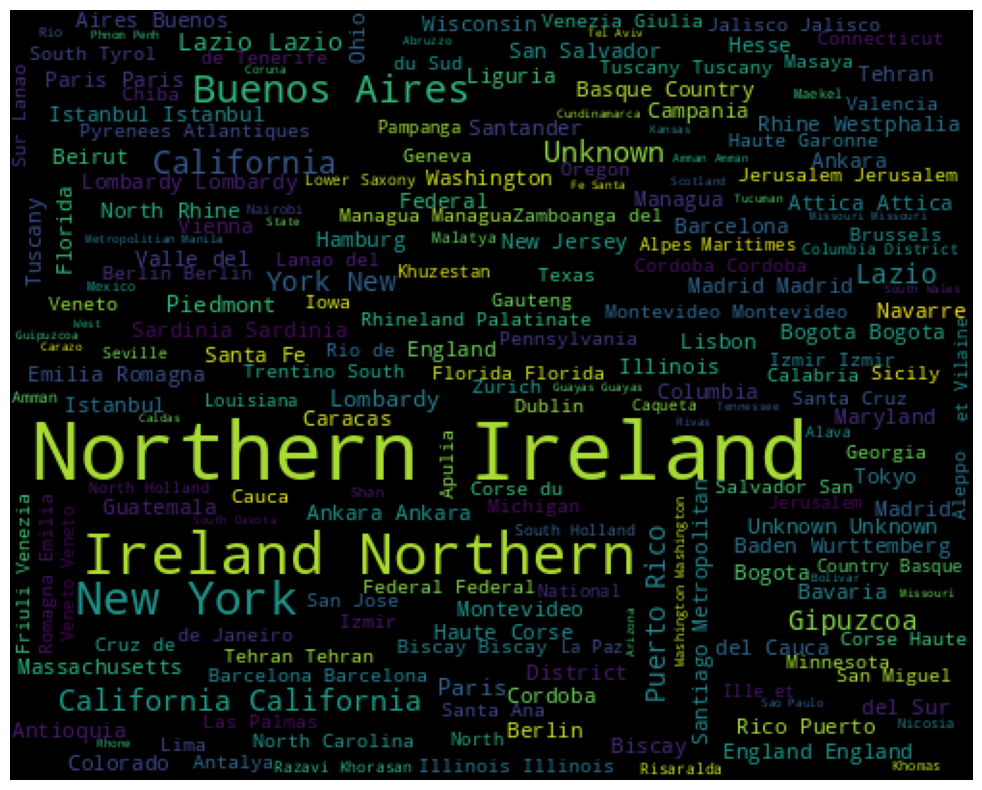

In [10]:
from wordcloud import WordCloud
from scipy import signal
cities = global_terror.state.dropna()
plt.subplots(figsize=(20,10))
wordcloud = WordCloud(background_color = 'black',
                     width = 500,
                     height = 400).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [11]:
global_terror['Year'].value_counts(dropna = False).sort_index()

Year
1970     651
1971     471
1972     568
1973     473
1974     581
1975     740
1976     923
1977    1319
1978    1526
1979      64
Name: count, dtype: int64

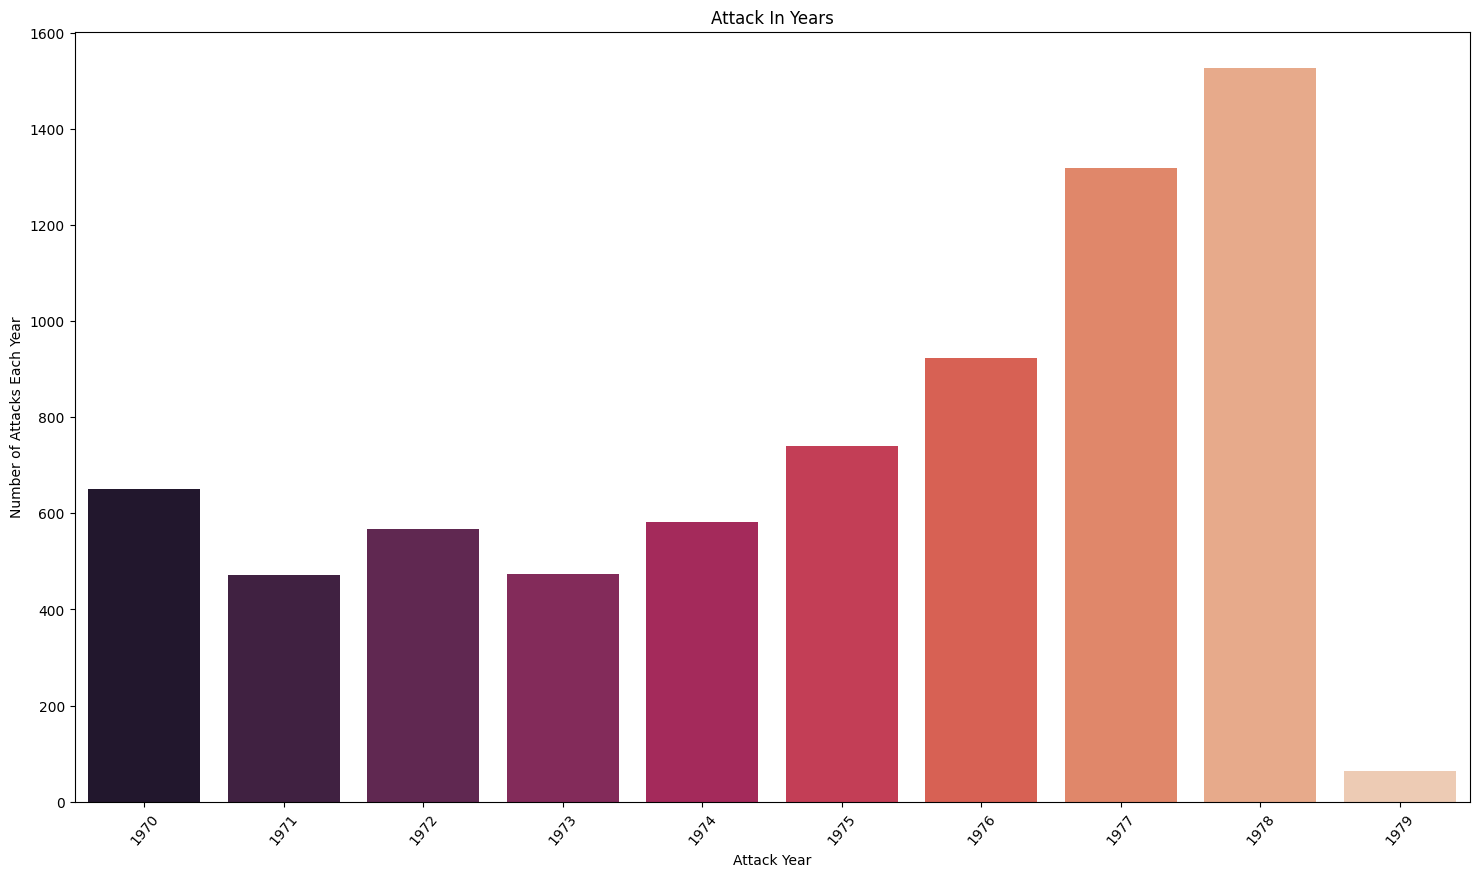

In [12]:
x_year = global_terror['Year'].unique()
y_count_years = global_terror['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 50)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks Each Year')
plt.title('Attack In Years')
plt.show()

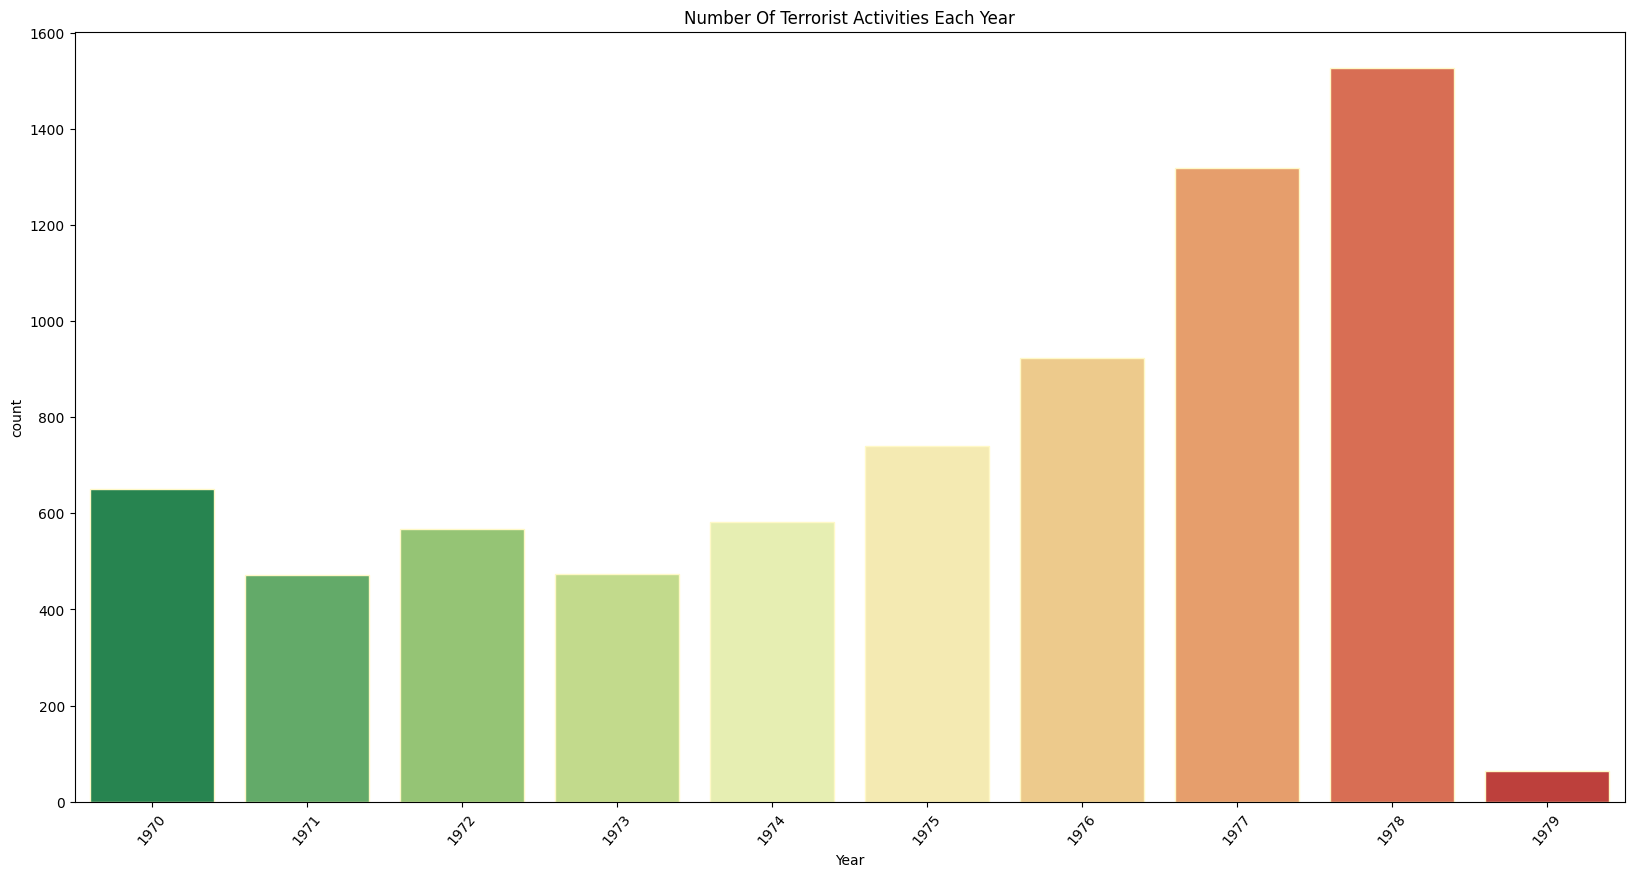

In [14]:
plt.subplots(figsize=(20,10))
sns.countplot(x='Year',data=global_terror,palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=50)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

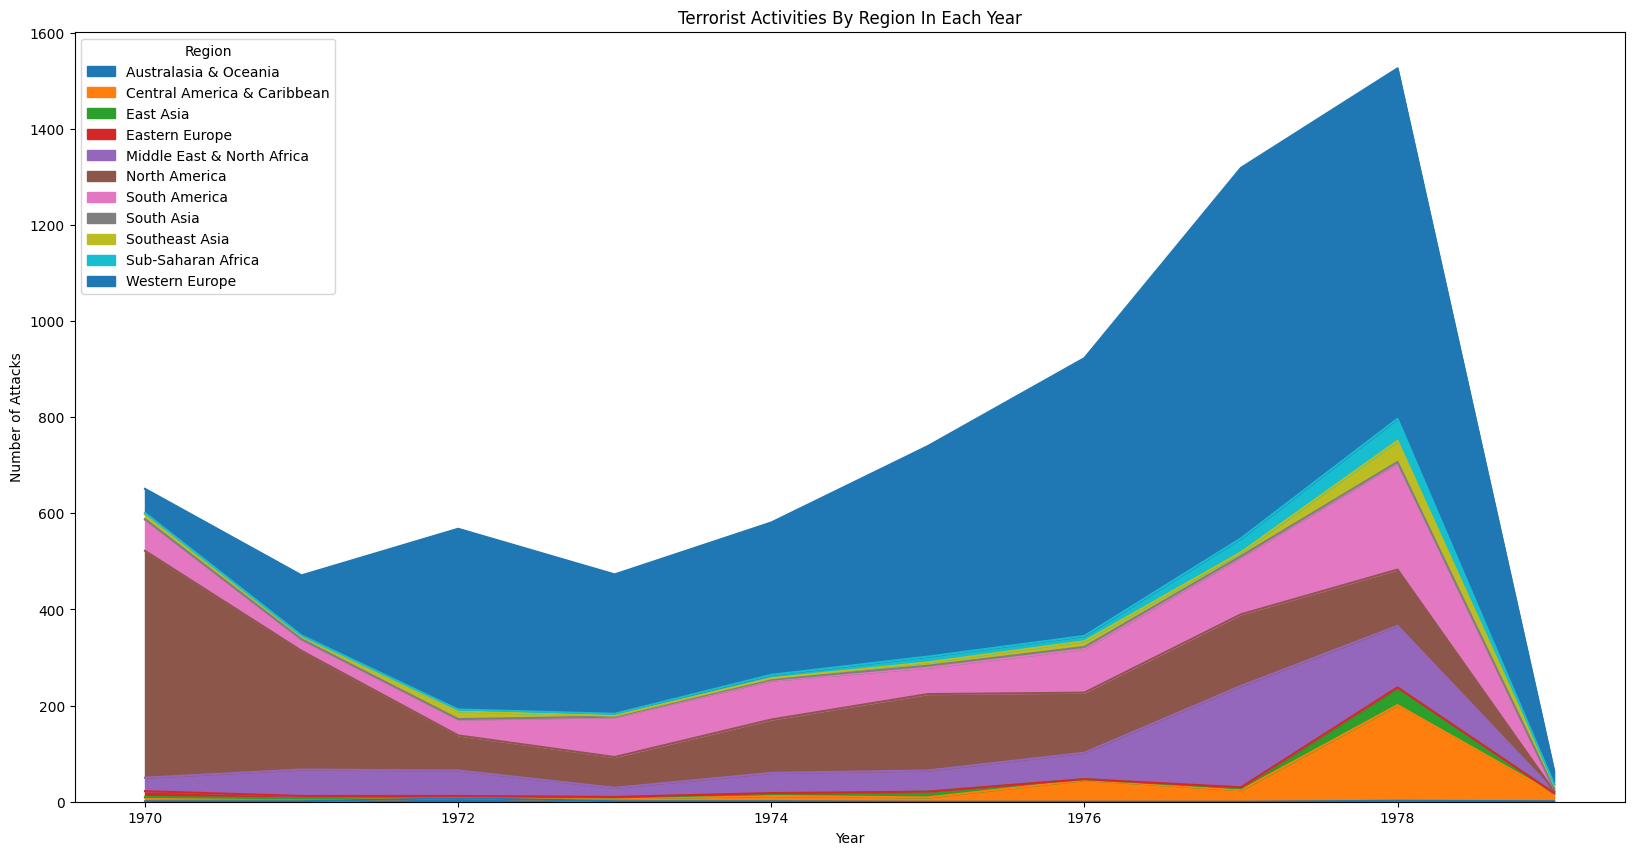

In [15]:
pd.crosstab(global_terror.Year, global_terror.Region).plot(kind='area',figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [16]:
global_terror['Wounded'] = global_terror['Wounded'].fillna(0).astype(int)
global_terror['Killed'] = global_terror['Killed'].fillna(0).astype(int)
global_terror['Casualities'] = global_terror['Killed'] + global_terror['Wounded']

In [17]:
global_terror1 = global_terror.sort_values(by='Casualities',ascending=False)[:50]

In [18]:
heat=global_terror1.pivot_table(index='Country',columns='Year',values='Casualities')
heat.fillna(0,inplace=True)

In [19]:
heat.head()

Year       1970  1972  1973  1974  1975   1976  1977   1978
Country                                                    
Argentina   0.0   0.0   0.0   0.0  92.0   52.5   0.0    0.0
Barbados    0.0   0.0   0.0   0.0   0.0   73.0   0.0    0.0
Greece      0.0   0.0  60.0  88.0   0.0    0.0   0.0    0.0
Iran        0.0   0.0   0.0   0.0   0.0    0.0   0.0  234.0
Iraq        0.0   0.0   0.0   0.0   0.0  295.0   0.0    0.0

In [20]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 50 Worst Terror Attacks in History from 1982 to 2017',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

In [21]:
global_terror.Country.value_counts()[:21]

Country
United Kingdom        1407
United States         1406
Italy                  824
Spain                  632
Turkey                 343
Argentina              314
Colombia               282
France                 265
West Germany (FRG)     256
Greece                 134
El Salvador            119
Mexico                 104
Nicaragua              100
Iran                    95
Philippines             76
Israel                  65
Lebanon                 62
Guatemala               61
Japan                   60
Uruguay                 48
Portugal                40
Name: count, dtype: int64

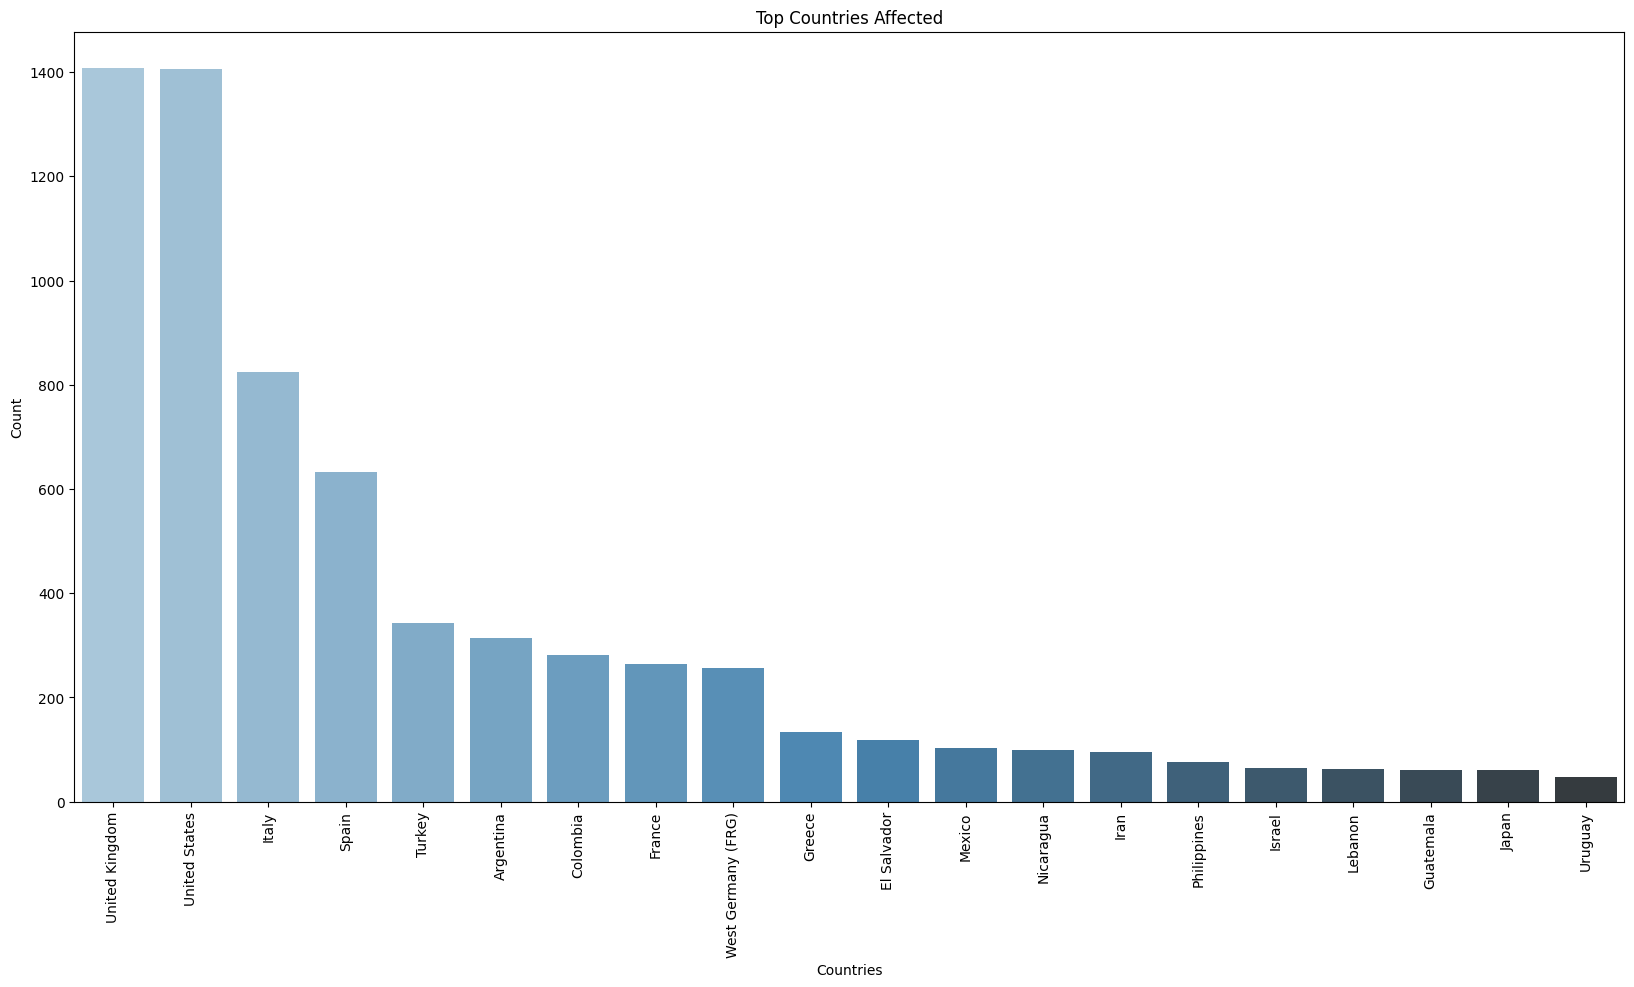

In [23]:
plt.subplots(figsize=(20,10))
top_countries = global_terror['Country'].value_counts()[:20]
sns.barplot(x=top_countries.index, y=top_countries.values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

In [24]:
import folium
from folium.plugins import MarkerCluster

In [25]:
filterYear = global_terror['Year'] == 2001

In [26]:
filterData = global_terror[filterYear]

reqFilterData = filterData.loc[:,'city':'longitude']
reqFilterData = reqFilterData.dropna()
reqFilterDataList = reqFilterData.values.tolist()


In [27]:
map = folium.Map(location = [0, 50], tiles='CartoDB positron', zoom_start=2)
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

In [28]:
global_terror.Group.value_counts()[1:20]

Group
Irish Republican Army (IRA)                              820
Basque Fatherland and Freedom (ETA)                      263
Protestant extremists                                    188
Left-Wing Militants                                      169
Ulster Volunteer Force (UVF)                             164
Red Brigades                                             124
Black September                                          120
Montoneros (Argentina)                                   109
Fuerzas Armadas de Liberacion Nacional (FALN)             96
Ulster Freedom Fighters (UFF)                             91
New World Liberation Front (NWLF)                         86
Sandinista National Liberation Front (FSLN)               84
Black Nationalists                                        83
Ejercito Revolucionaria del Pueblo (ERP) (Argentina)      82
First of October Antifascist Resistance Group (GRAPO)     75
Student Radicals                                          71
Revolutionary Arme

In [29]:
test = global_terror[global_terror.Group.isin(['Shining Path (SL)','Taliban','Islamic State of Iraq and the Levant (ISIL)'])]

In [30]:
test.Country.unique()

array(['Peru'], dtype=object)

In [31]:
global_terror_df_group = global_terror.dropna(subset=['latitude','longitude'])

In [ ]:
global_terror_df_group = global_terror_df_group.drop_duplicates(subset=['Country','Group'])

In [32]:
terrorist_groups = global_terror.Group.value_counts()[1:8].index.tolist()
global_terror_df_group = global_terror_df_group.loc[global_terror_df_group.Group.isin(terrorist_groups)]
print(global_terror_df_group.Group.unique())

['Left-Wing Militants' 'Irish Republican Army (IRA)'
 'Ulster Volunteer Force (UVF)' 'Protestant extremists'
 'Basque Fatherland and Freedom (ETA)' 'Black September' 'Red Brigades']


In [33]:
map = folium.Map(location=[50, 0], tiles="CartoDB positron", zoom_start=2)
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for i in range(0,len(global_terror_df_group)):
    folium.Marker([global_terror_df_group.iloc[i]['latitude'],global_terror_df_group.iloc[i]['longitude']],
                  popup='Group:{}<br>Country:{}'.format(global_terror_df_group.iloc[i]['Group'],
                  global_terror_df_group.iloc[i]['Country'])).add_to(map)
map


In [34]:
m1 = folium.Map(location=[50, 0], tiles="CartoDB positron", zoom_start=2)
marker_cluster = MarkerCluster(
    name='clustered icons',
    overlay=True,
    control=False,
    icon_create_function=None
)
for i in range(0,len(global_terror_df_group)):
    marker=folium.Marker([global_terror_df_group.iloc[i]['latitude'],global_terror_df_group.iloc[i]['longitude']])
    popup='Group:{}<br>Country:{}'.format(global_terror_df_group.iloc[i]['Group'],
                                          global_terror_df_group.iloc[i]['Country'])
    folium.Popup(popup).add_to(marker)
    marker_cluster.add_child(marker)
marker_cluster.add_to(m1)
folium.TileLayer('openstreetmap').add_to(m1)
#folium.TileLayer('Mapbox Bright').add_to(m1)
folium.TileLayer('cartodbdark_matter').add_to(m1)
folium.TileLayer('stamentoner').add_to(m1)
folium.LayerControl().add_to(m1)

m1

In [35]:
global_terror.head()

eventid  Year  Month  Day approxdate  extended resolution  country  \
0  197000000001  1970      7    2        NaN         0        NaN       58   
1  197000000002  1970      0    0        NaN         0        NaN      130   
2  197001000001  1970      1    0        NaN         0        NaN      160   
3  197001000002  1970      1    0        NaN         0        NaN       78   
4  197001000003  1970      1    0        NaN         0        NaN      101   

              Country  region  ... scite1 scite2 scite3  dbsource  INT_LOG  \
0  Dominican Republic       2  ...    NaN    NaN    NaN      PGIS      0.0   
1              Mexico       1  ...    NaN    NaN    NaN      PGIS      0.0   
2         Philippines       5  ...    NaN    NaN    NaN      PGIS     -9.0   
3              Greece       8  ...    NaN    NaN    NaN      PGIS     -9.0   
4               Japan       4  ...    NaN    NaN    NaN      PGIS     -9.0   

   INT_IDEO  INT_MISC INT_ANY related  Casualities  
0       0.0       0.0     0.0     NaN            1  
1       1.0       1.0     1.0     NaN            0  
2      -9.0       1.0     1.0     NaN            1  
3      -9.0       1.0     1.0     NaN            0  
4      -9.0       1.0     1.0     NaN            0  

[5 rows x 136 columns]

In [36]:
killData = global_terror.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))

Number of people killed by terror attack: 5114


In [37]:
attackData = global_terror.loc[:,'AttackType']

typeKillData = pd.concat([attackData, killData], axis=1)

In [38]:
typeKillData.head()

AttackType  Killed
0                   Assassination       1
1     Hostage Taking (Kidnapping)       0
2                   Assassination       1
3               Bombing/Explosion       0
4  Facility/Infrastructure Attack       0

In [39]:
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData

AttackType  Armed Assault  Assassination  Bombing/Explosion  \
Killed               1050           1484               1568   

AttackType  Facility/Infrastructure Attack  Hijacking  \
Killed                                 454        175   

AttackType  Hostage Taking (Barricade Incident)  Hostage Taking (Kidnapping)  \
Killed                                      177                          113   

AttackType  Unarmed Assault  Unknown  
Killed                    8       85

In [40]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Killed to Killed
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Armed Assault                        1 non-null      int64
 1   Assassination                        1 non-null      int64
 2   Bombing/Explosion                    1 non-null      int64
 3   Facility/Infrastructure Attack       1 non-null      int64
 4   Hijacking                            1 non-null      int64
 5   Hostage Taking (Barricade Incident)  1 non-null      int64
 6   Hostage Taking (Kidnapping)          1 non-null      int64
 7   Unarmed Assault                      1 non-null      int64
 8   Unknown                              1 non-null      int64
dtypes: int64(9)
memory usage: 188.0+ bytes


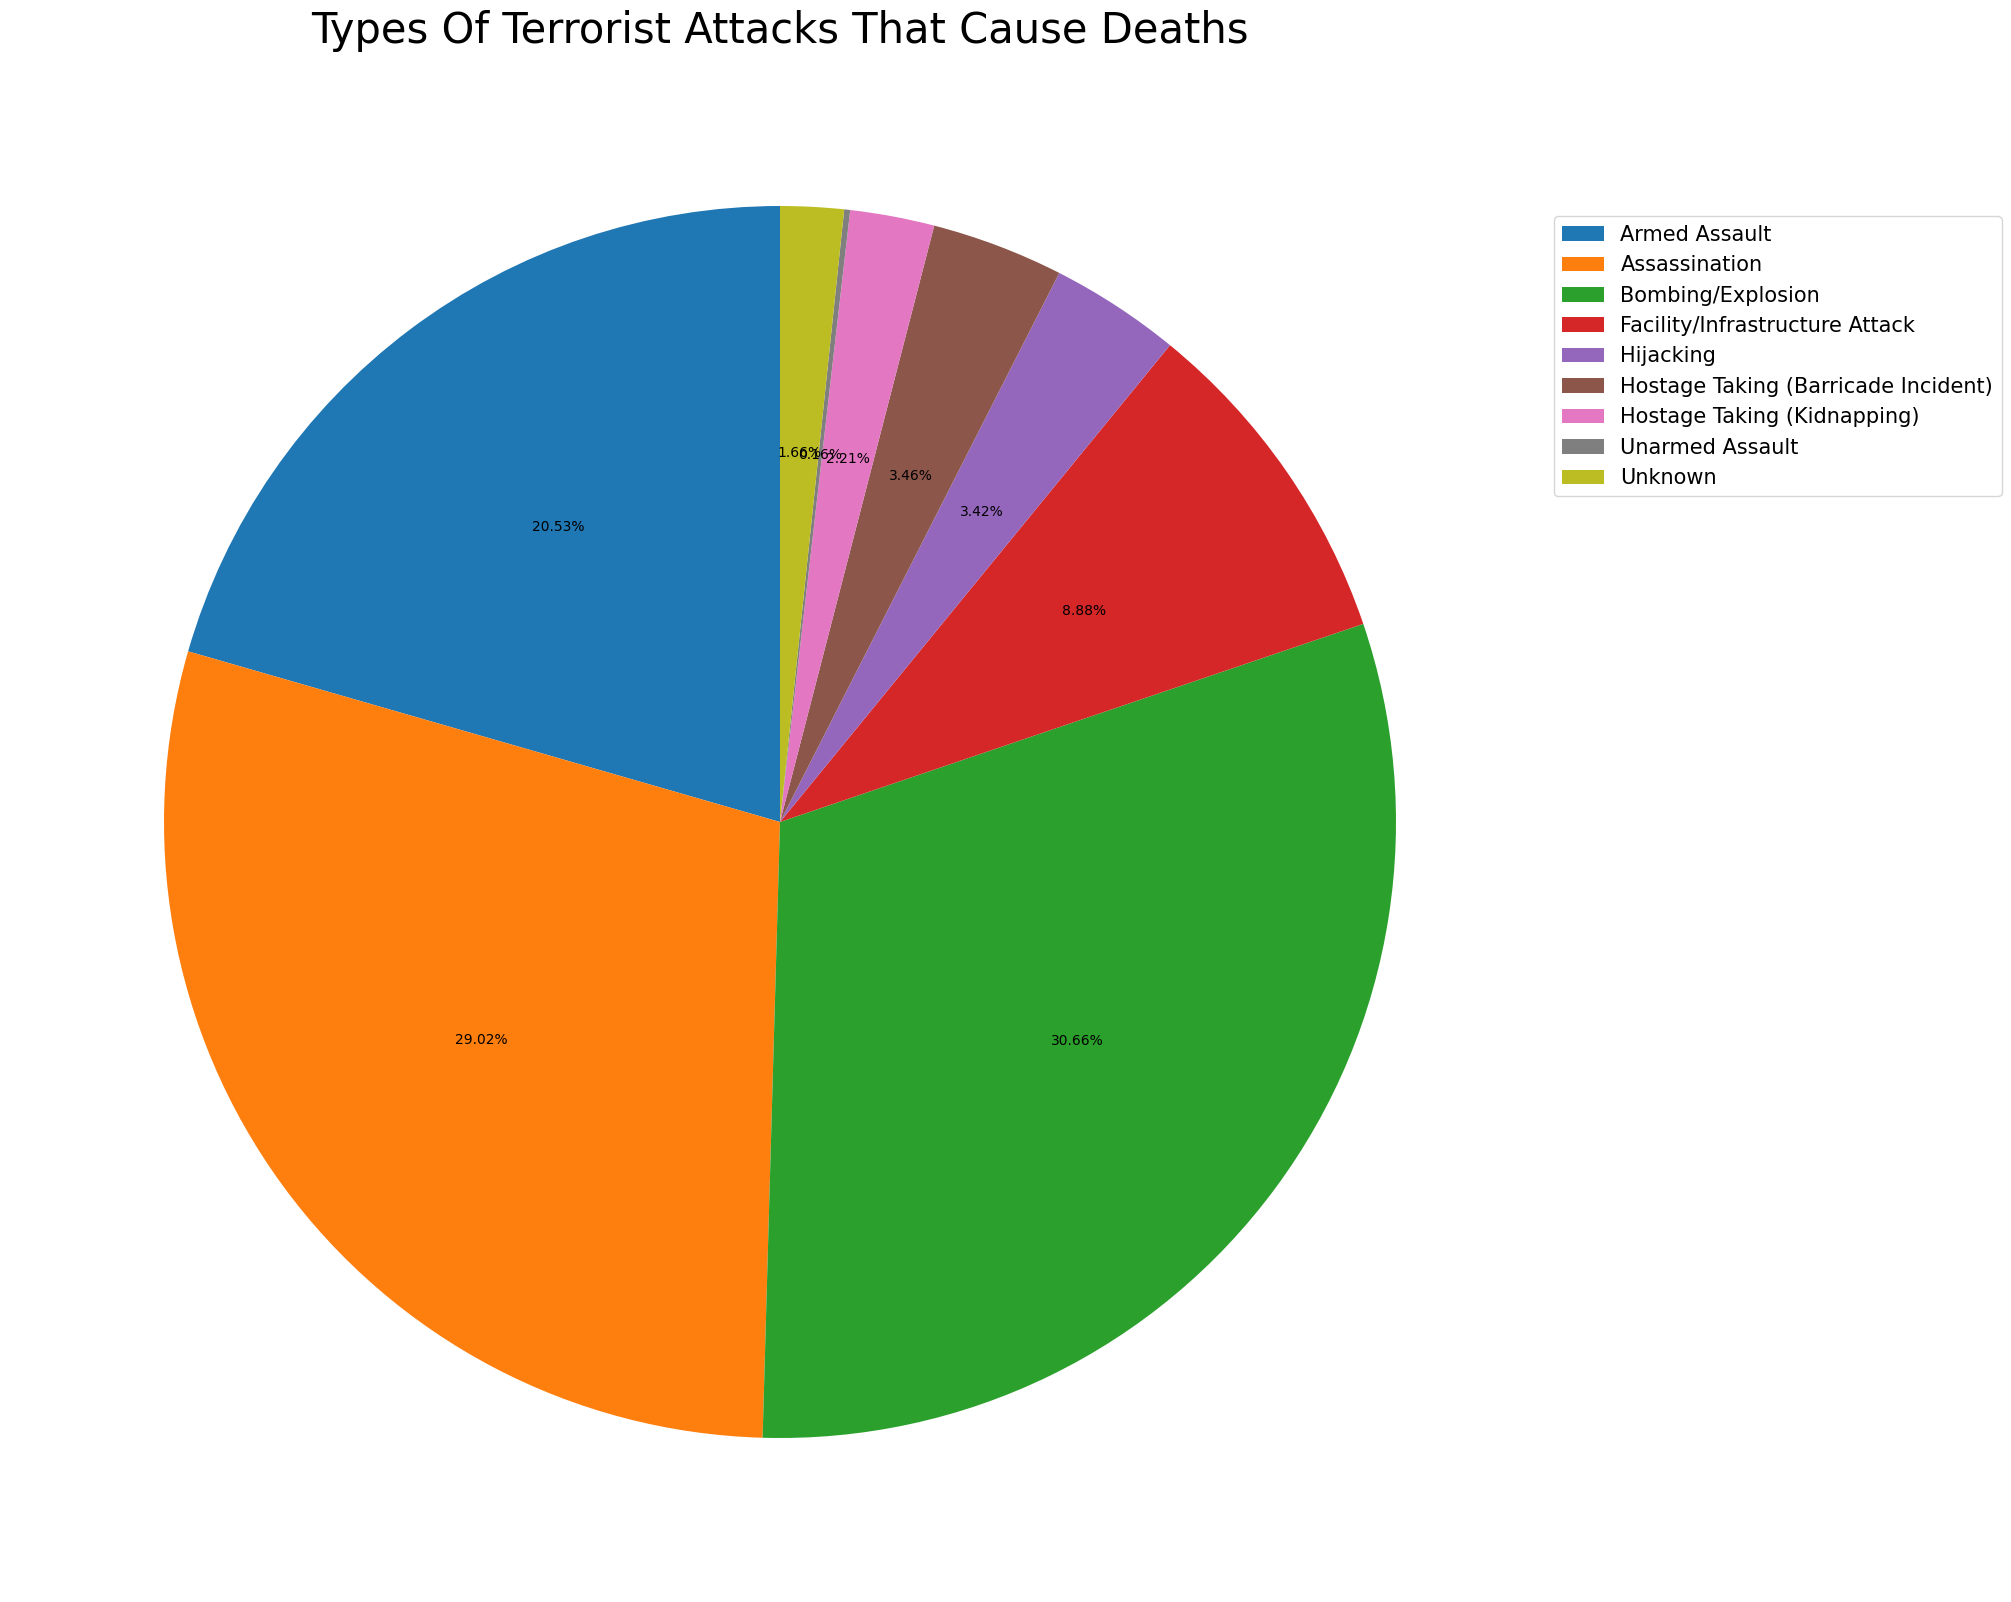

In [42]:
labels = typeKillFormatData.columns.tolist()
values = typeKillFormatData.values.flatten().tolist()
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types Of Terrorist Attacks That Cause Deaths',fontsize=30)
plt.legend(labels, loc='upper right', bbox_to_anchor = (1.3, 0.9), fontsize=15)
plt.show()

In [43]:
global_terror.head(2)

eventid  Year  Month  Day approxdate  extended resolution  country  \
0  197000000001  1970      7    2        NaN         0        NaN       58   
1  197000000002  1970      0    0        NaN         0        NaN      130   

              Country  region  ... scite1 scite2 scite3  dbsource  INT_LOG  \
0  Dominican Republic       2  ...    NaN    NaN    NaN      PGIS      0.0   
1              Mexico       1  ...    NaN    NaN    NaN      PGIS      0.0   

   INT_IDEO  INT_MISC INT_ANY related  Casualities  
0       0.0       0.0     0.0     NaN            1  
1       1.0       1.0     1.0     NaN            0  

[2 rows x 136 columns]

In [45]:
countryData = global_terror.loc[:,'Country']

countryKillData = pd.concat([countryData, killData], axis=1)

In [46]:
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData

Country  Afghanistan  Algeria  Andorra  Angola  Argentina  Australia  Austria  \
Killed             0        0        0       0        317          3        9   

Country  Bahamas  Bangladesh  Barbados  ...  United Kingdom  United States  \
Killed         0           0        73  ...            1638            164   

Country  Uruguay  Venezuela  West Bank and Gaza Strip  West Germany (FRG)  \
Killed         4          2                         9                  44   

Country  Western Sahara  Yugoslavia  Zaire  Zambia  
Killed                0           2      1       5  

[1 rows x 102 columns]

In [47]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

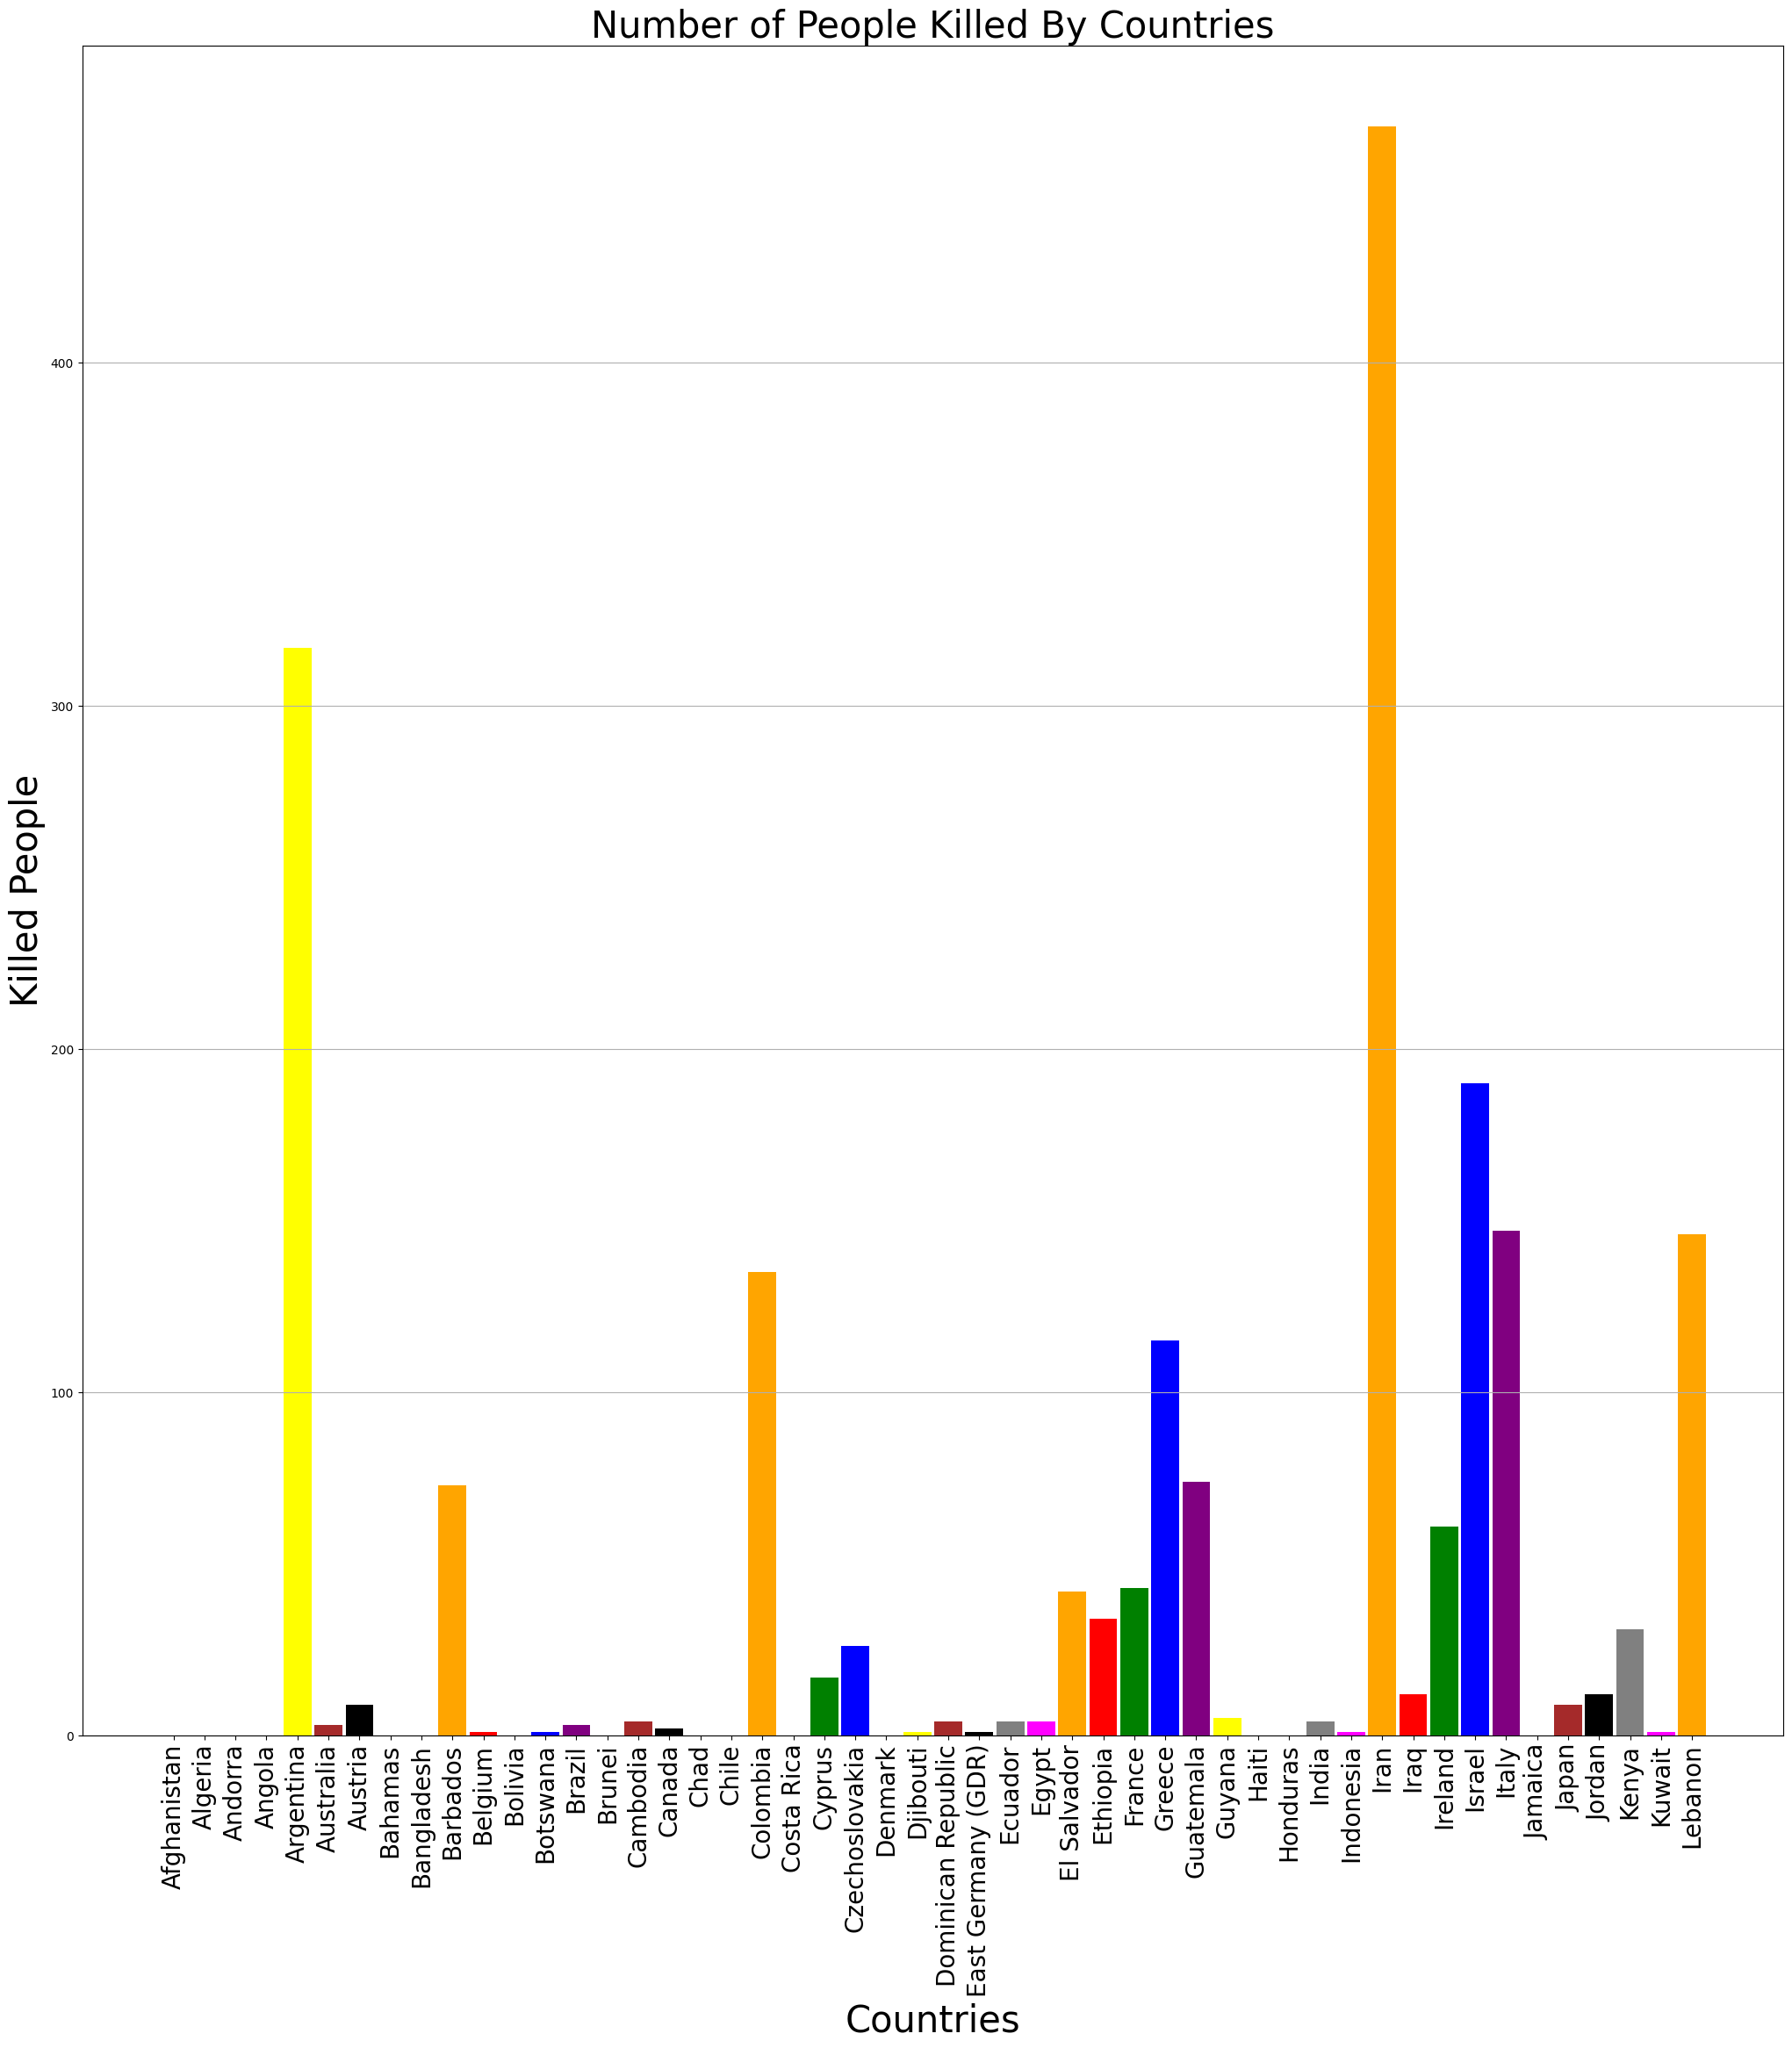

In [48]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=30)
plt.xlabel('Countries', fontsize = 30)
plt.xticks(index, labels, fontsize=20, rotation=90)
plt.title('Number of People Killed By Countries', fontsize = 30)
# print(fig_size)
plt.show()

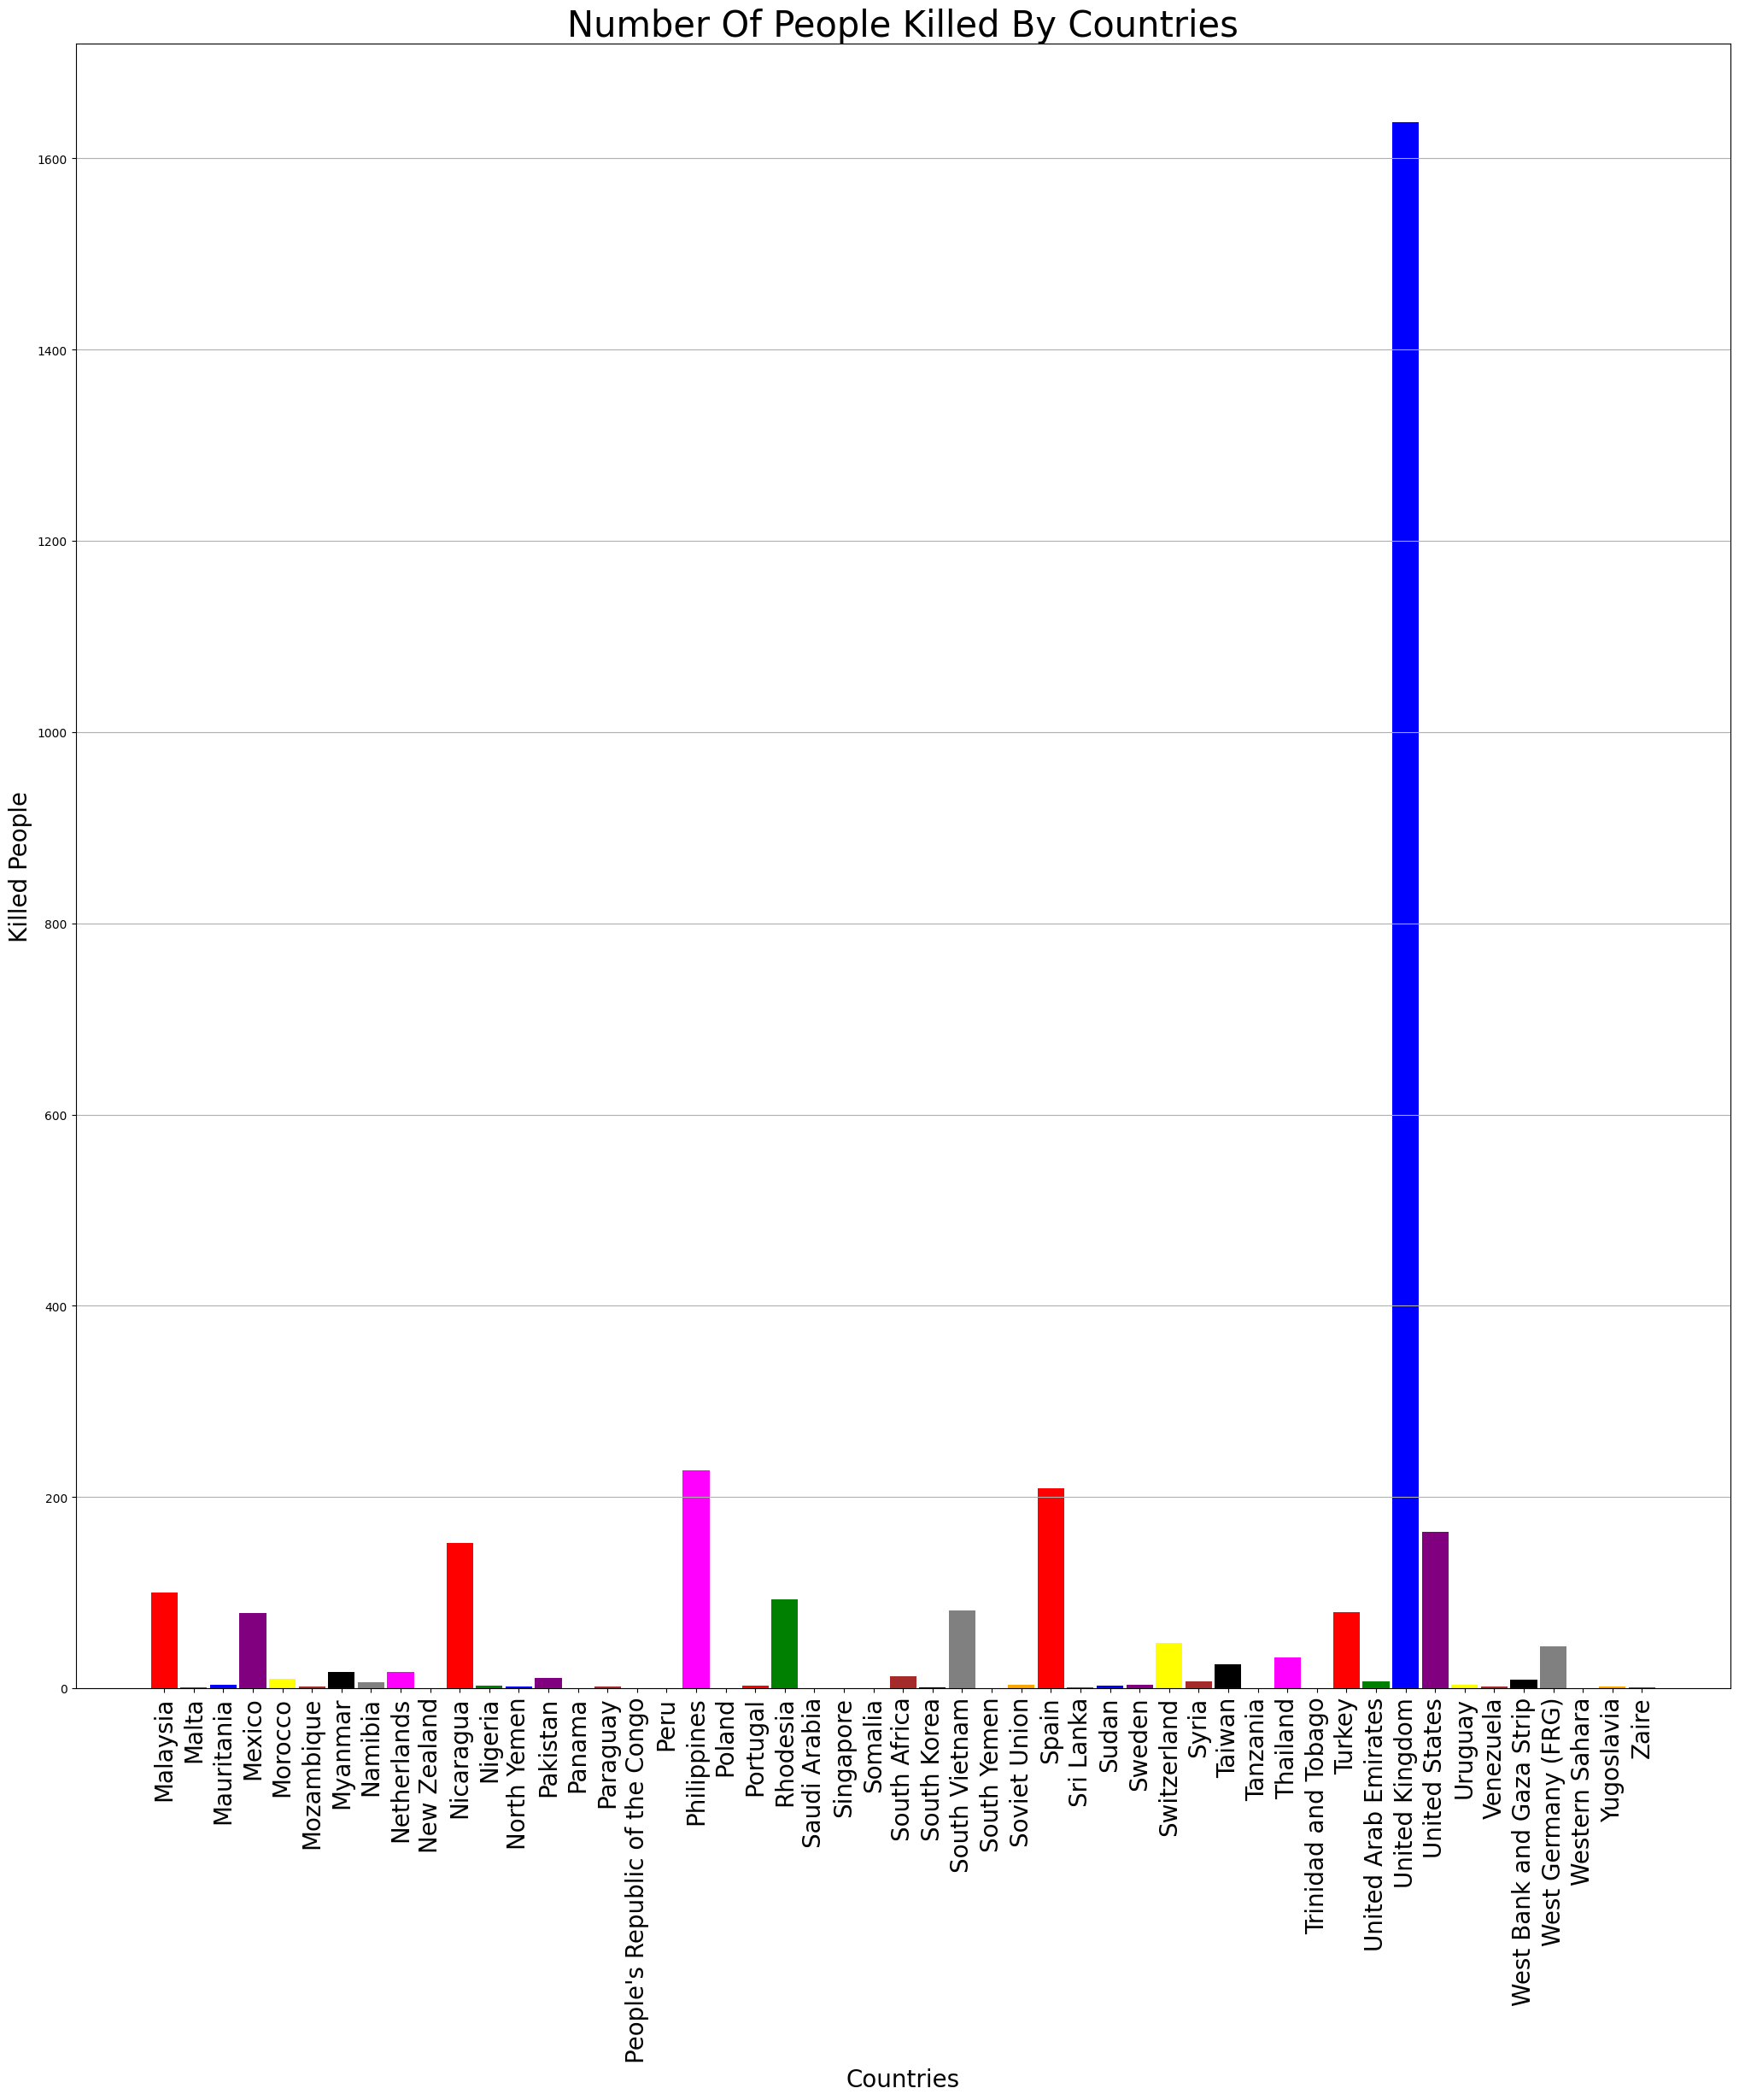

In [49]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=20
fig_size[1]=20
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=20, rotation=90)
plt.title('Number Of People Killed By Countries', fontsize = 30)
plt.show()

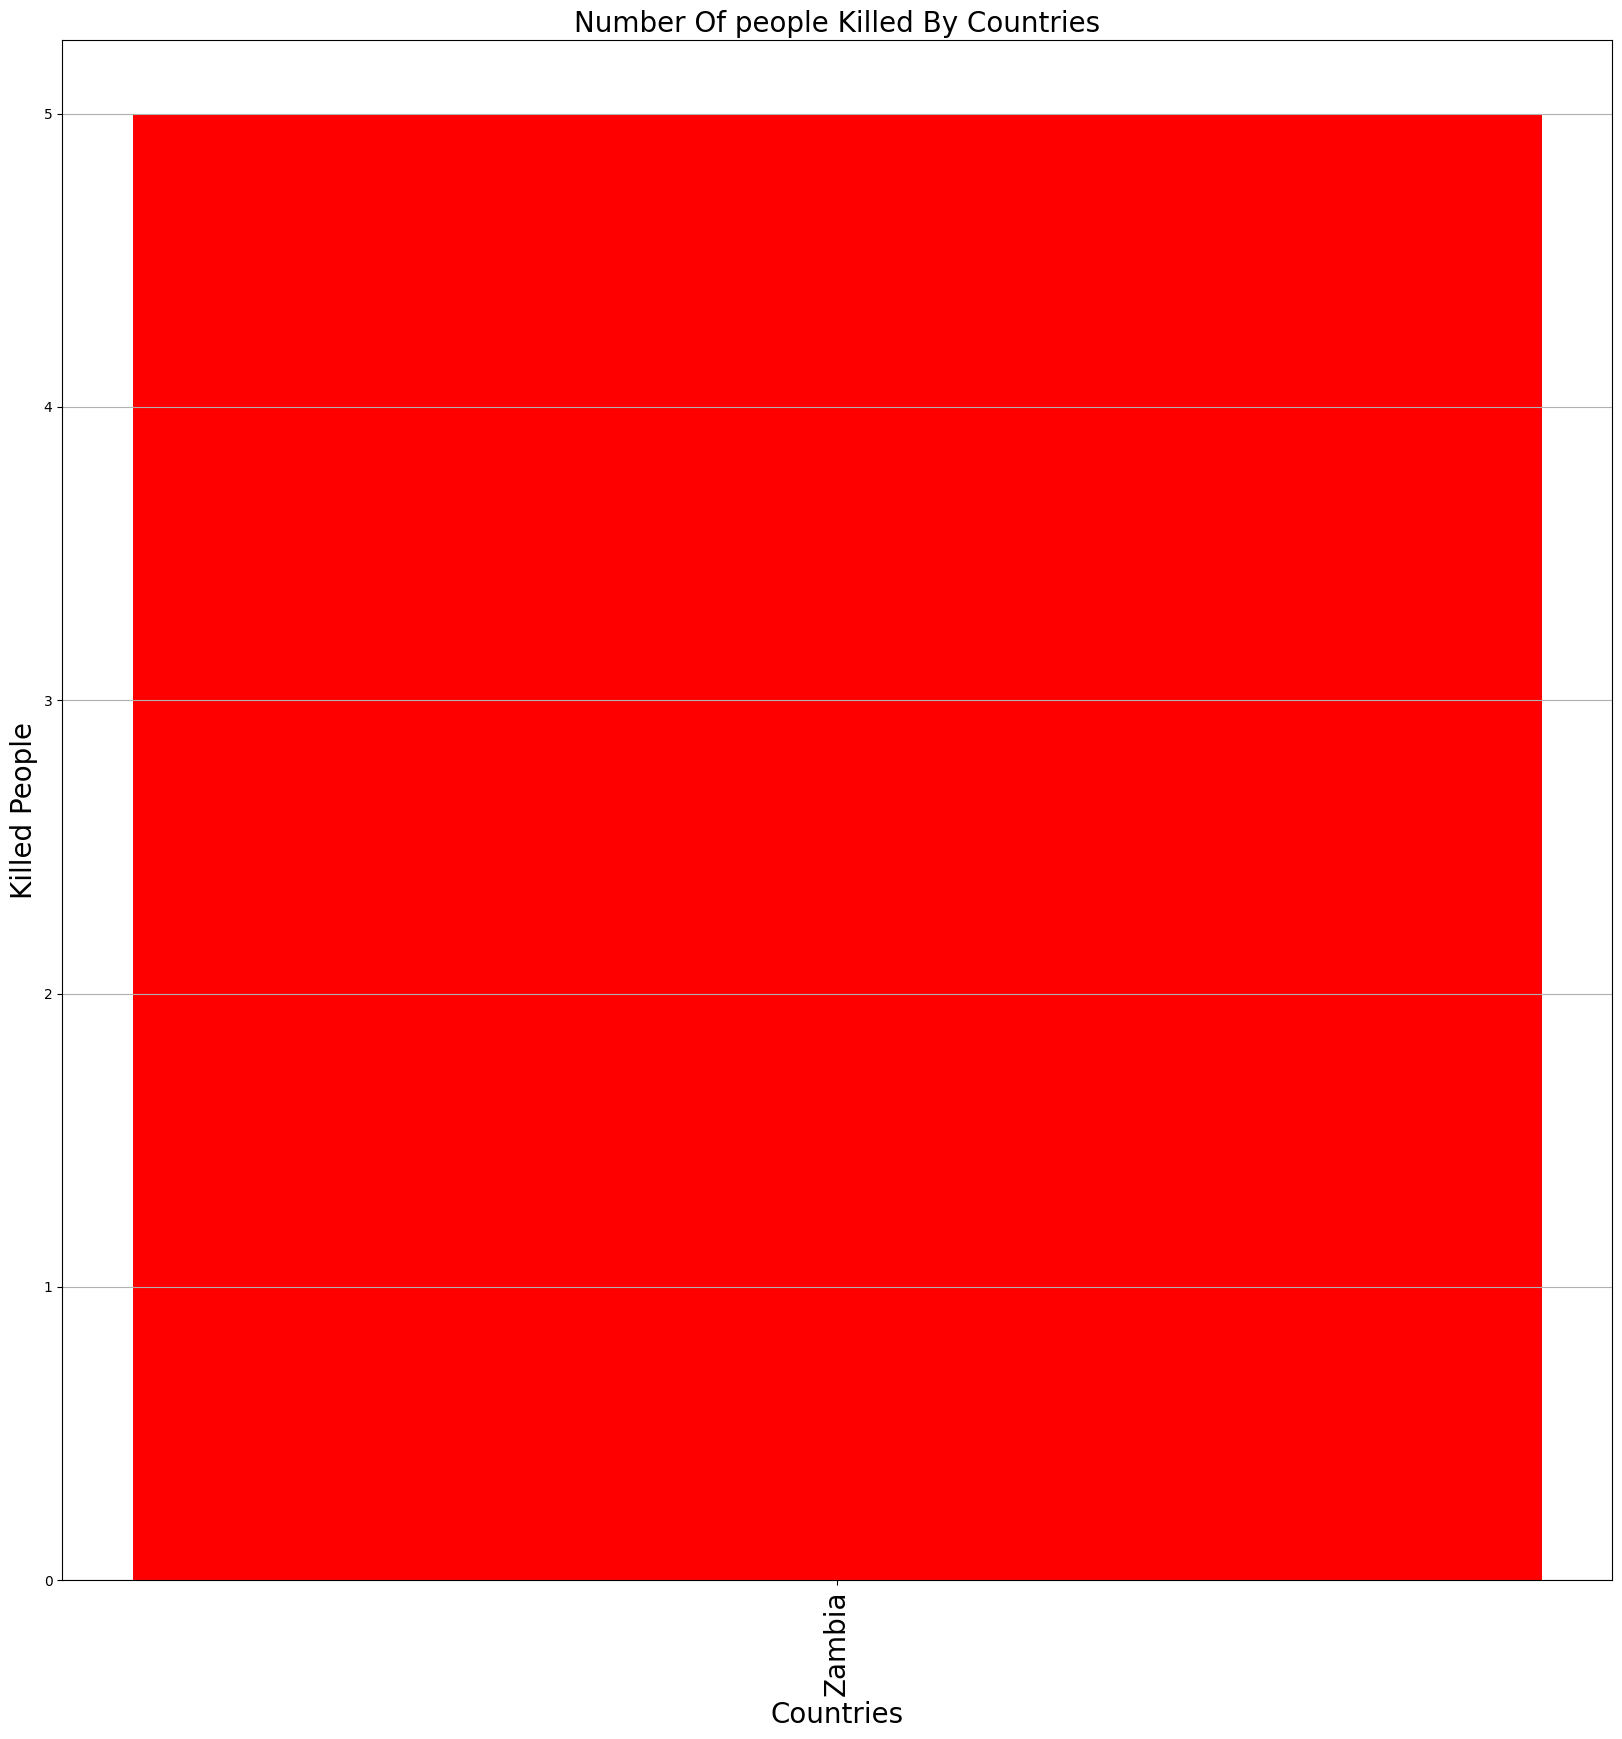

In [50]:
labels = countryKillFormatData.columns.tolist()
labels = labels[101:152]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[101:152]
values = [int(i[0]) for i in values]
colors = ['red', 'blue', 'brown', 'orange', 'purple', 'yellow', 'black', 'green', 'gray', 'magenta']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=20, rotation=90)
plt.title('Number Of people Killed By Countries', fontsize = 20)
plt.show()

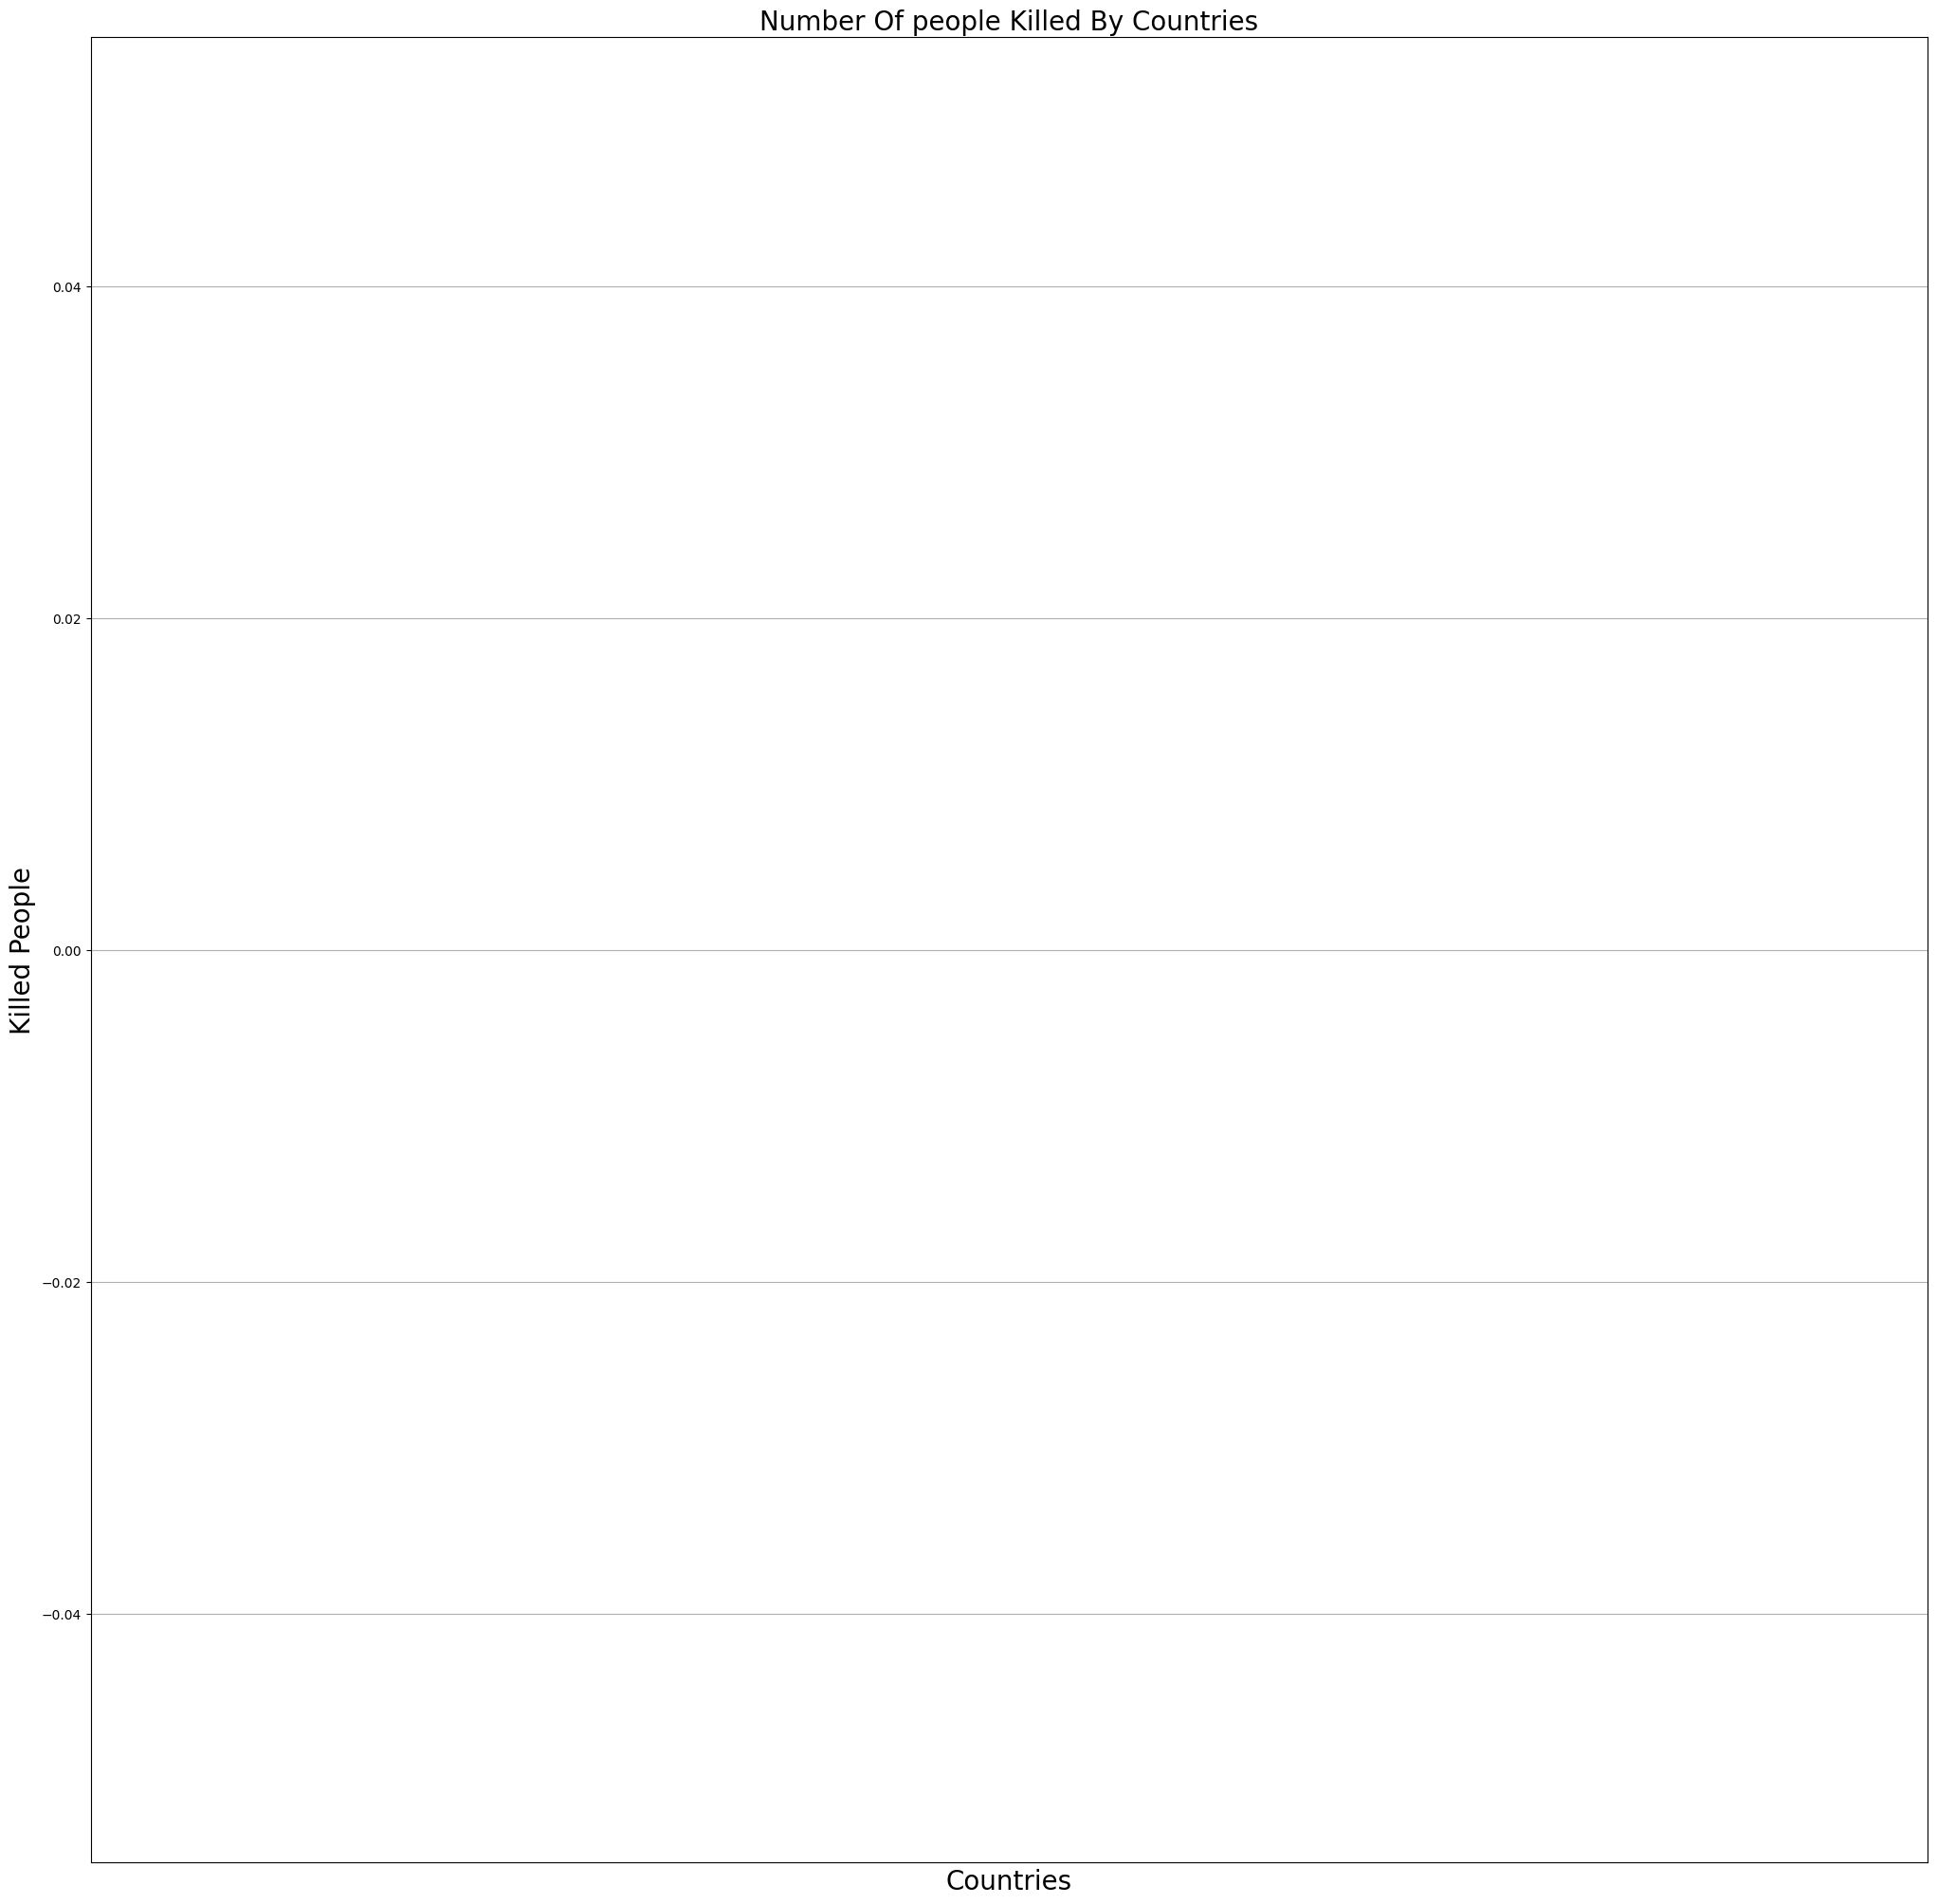

In [51]:
labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=20, rotation=90)
plt.title('Number Of people Killed By Countries', fontsize = 20)
plt.show()